In [1]:
import sympy as sym
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S, I, V = sym.Function("S"), sym.Function("I"), sym.Function("V")
N, mu, P, beta, gamma, t = sym.symbols("N, mu, P, beta, gamma, t")

In [3]:
eq1 = sym.Derivative(S(t), t) - (mu * N * (1 - P) - mu * S(t) - beta * I(t) * S(t) / N)
eq2 = sym.Derivative(I(t), t) - (beta * I(t) * S(t) / N  - (mu + gamma) * I(t))
eq3 = sym.Derivative(V(t), t) - (mu * N * P - mu * V(t))

In [4]:
sym.dsolve((eq1, eq2, eq3))

NotImplementedError: 

Further investigation shows that an exact solution to this system of differential equations is difficult. Let us do this numerically:

In [5]:
def dx(x, t, a, b, c):

    return (- a * x[1] * x[0] - c * x[0],
            a * x[1] * x[0]  - b * x[1],
            b * x[1] + c * x[0])

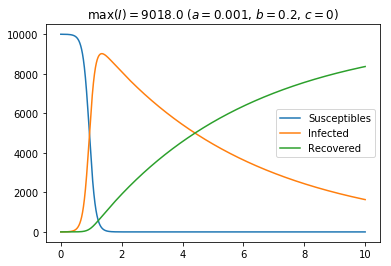

In [6]:
infection_rate = 1 / 1000  # Every 1000 interactions leads to infection
recovery_rate = 1 / 5  # take 5 time units to recover
N = 10 ** 4  # Population of 10 thousand people

a, b, c = infection_rate, recovery_rate, 0
ts = np.linspace(0, 10, 5000)
xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(a, b, c))
S, I, R = xs.T
plt.figure()
plt.plot(ts, S, label="Susceptibles")
plt.plot(ts, I, label="Infected")
plt.plot(ts, R, label="Recovered")
plt.legend()
plt.title(f"$\max(I)={round(max(I))}$ ($a={a}$, $b={b}$, $c={c}$)");

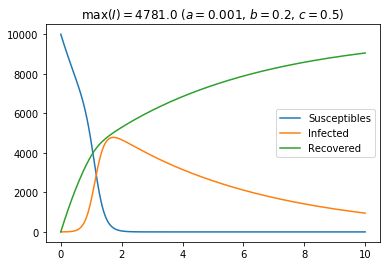

In [7]:
c = 1 / 2  # Vaccinate half the population
ts = np.linspace(0, 10, 5000)
xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(a, b, c))
S, I, R = xs.T
plt.figure()
plt.plot(ts, S, label="Susceptibles")
plt.plot(ts, I, label="Infected")
plt.plot(ts, R, label="Recovered")
plt.legend()
plt.title(f"$\max(I)={round(max(I))}$ ($a={a}$, $b={b}$, $c={c}$)");

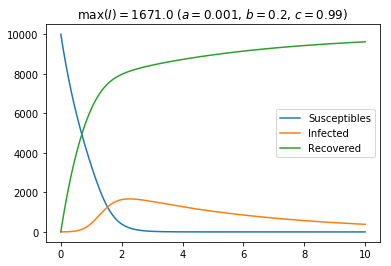

In [8]:
c = 99 / 100  # Vaccinate 99% of the population
ts = np.linspace(0, 10, 5000)
xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(a, b, c))
S, I, R = xs.T
plt.figure()
plt.plot(ts, S, label="Susceptibles")
plt.plot(ts, I, label="Infected")
plt.plot(ts, R, label="Recovered")
plt.legend()
plt.title(f"$\max(I)={round(max(I))}$ ($a={a}$, $b={b}$, $c={c}$)");

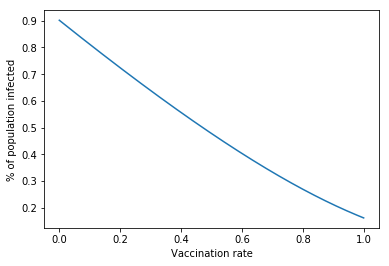

In [9]:
vaccination_rates = np.linspace(0, 1, 500)
max_percent_of_infected = []
for c in vaccination_rates:
    xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(a, b, c))
    S, I, R = xs.T
    max_percent_of_infected.append(max(I) / N)
plt.figure()
plt.plot(vaccination_rates, max_percent_of_infected)
plt.xlabel("Vaccination rate")
plt.ylabel("% of population infected");